<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/classification.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Classification

* Adapted from Raschka's [ch03.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb)
* scikit-learn's API consistent across classifiers
    * logistic regression
    * support vector classifier
    * decision tree
    * K nearest neighbors
    * naive Bayes
* train/test split
* standard scaler
* confusion matrix



In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# Stratified train/test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


# Standard scaler


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Plot the decision region

This version of the utility function differs slightly from Raschka's

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Logistic regression

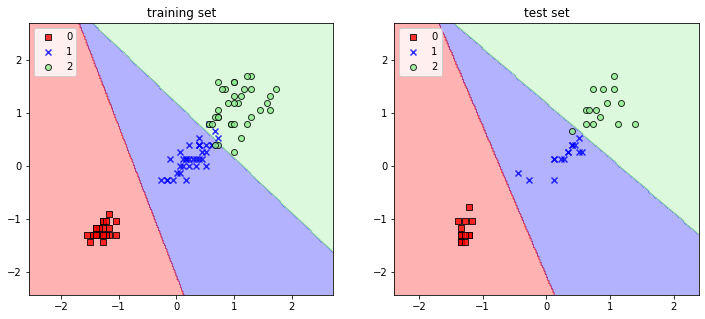

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

# Plot decision boundary for the training set
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plot_decision_regions(X_train_std, y_train, lr)
plt.title('training set')
plt.legend(loc='upper left')

# Plot the decision boundary for the test set
plt.subplot(1, 2, 2)
plot_decision_regions(X_test_std, y_test, lr)
plt.title('test set')
plt.legend(loc='upper left')
plt.show()

# Confusion matrix

By definition, $C_{i,j}$ (row $i$ and column $j$) equals the number of samples known to be in group $i$ and predicted to be in group $j$.

See: [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) reference docs -- scikit-learn.org

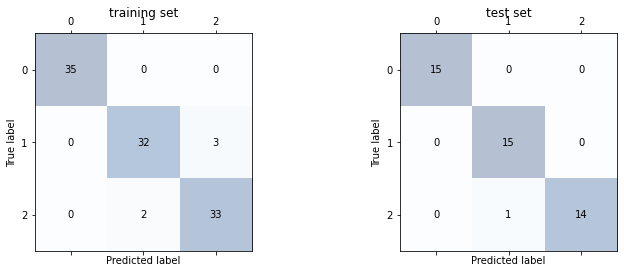

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(confmat, ax):
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')


y_pred = lr.predict(X_train_std)
confmat = confusion_matrix(y_true=y_train, y_pred=y_pred)
plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 2, 1)
plot_confusion_matrix(confmat, ax)
plt.title('training set')

y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = plt.subplot(1, 2, 2)
plot_confusion_matrix(confmat, ax)
plt.title('test set')
plt.show();

# SVM

# Decision Tree


# KNN

# Naive Bayes

[VanderPlas ch05.05.ipynb](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)